### 儿童死亡率--多元回归分析

数据解释：<br/>
CM：每千人中不足五岁便死亡的人数<br/>
PGNP:人均GDP<br/>
FLR：妇女识字率<br/>
计量经济学第五版P218<br/>

In [1]:
import numpy as np 
import pandas as pd
import statsmodels.formula.api as smf
%matplotlib inline

In [3]:
df=pd.read_excel('data/儿童死亡率.xls')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
CM      64 non-null int64
FLR     64 non-null int64
PGNP    64 non-null int64
TFR     64 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 KB


In [4]:
df.describe()

,CM,FLR,PGNP,TFR
count,64.000000,64.000000,64.000000,64.000000
mean,141.500000,51.187500,1401.250000,5.549687
std,75.978067,26.007859,2725.695775,1.508993
min,12.000000,9.000000,120.000000,1.690000
25%,82.000000,29.000000,300.000000,4.607500
50%,138.500000,48.000000,620.000000,6.040000
75%,192.500000,77.250000,1317.500000,6.615000
max,312.000000,95.000000,19830.000000,8.490000


In [4]:
df.head()

,CM,FLR,PGNP,TFR
0,128,37,1870,6.66
1,204,22,130,6.15
2,202,16,310,7.00
3,197,65,570,6.25
4,96,76,2050,3.81


### 双变量回归分析--儿童死亡率与人均GNP

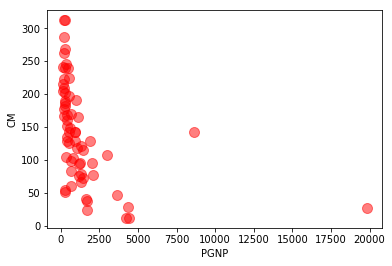

In [8]:
df.plot(kind='scatter',x='PGNP',y='CM',c='red',s=100,alpha=0.5)

In [9]:
results = smf.ols('CM ~ 1 +PGNP', data=df).fit()

In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     12.36
Date:                Tue, 26 Sep 2017   Prob (F-statistic):           0.000826
Time:                        14:09:32   Log-Likelihood:                -361.64
No. Observations:                  64   AIC:                             727.3
Df Residuals:                      62   BIC:                             731.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    157.4244      9.846     15.989      0.0

PGNP的系数为-0.0114，与预期一致，对CM有负影响，PGNP每提高1单位，CM将减少0.0114单位
t=-3.516，p=0.001,均显著，表明PGNP对CM有影响，应该包含在模型当中。
####  R2为0.166，说明儿童死亡率的变异中，有16.6可由PGNP来解释，这个R2并不高，说明模型拟合效果一般。
#### 雅克-贝拉检验表明：JB统计量2.545，在正态性假定下，得到这样一个统计量的概率为28%。不拒绝残差项
#### 是正态分布的假设。

#### F-statistic:12.36，Prob (F-statistic):0.000826，拒绝人均GNP对儿童死亡率没有影响的假设

### 三变量回归分析：儿童死亡率与人均GNP和妇女识字率

In [13]:
results2 = smf.ols('CM ~ 1 +PGNP+FLR', data=df).fit()

In [14]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Tue, 12 Sep 2017   Prob (F-statistic):           5.12e-17
Time:                        18:25:59   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    263.6416     11.593     22.741      0.0

PGNP的偏回归系数为-0.0056，与预期一致，对CM有负影响，在FLR保持不变时，PGNP每提高1单位，CM将减少0.0056单位
与-0.0114相比，PGNP对CM的影响减小了，说明我们的双变量回归模型有设定误差。
t=-2.819，p=0.006,均显著，表明PGNP对CM有影响，应该包含在模型当中。
如果虚拟假设正确，得到一个大于等于2.8187的t值得概率为0，006.

FLR的偏回归系数为-2.2316，与预期一致，对CM有负影响，妇女识字率越高，儿童死亡率越低。在PGNP保持不变时，FLR每提高1单位，CM将减少2.2316单位

t=-10.629 ，p=0.000,均显著，表明PGNP对CM有影响，应该包含在模型当中。

调整R2为 0.698，说明儿童死亡率的变异中，有0.698可由模型来解释，这个R2很高，说明模型拟合效果很好。
雅克-贝拉检验表明：JB统计量0.559，在正态性假定下，得到这样一个统计量的概率为75.6%。不拒绝残差项
是正态分布的假设。
注意：JB检验为大样本检验，64次观测可能不够多。
skew：残差的偏度，正态分布为0
kurtosis：残差的峰度，正态分布为3

### 整体显著性检验
<p>$H_0:\beta_1=\beta_2=0$<p/>
<p>F-statistic:73.83,在零假设下，得到这样一个值得概率，<p/>
<p>Prob (F-statistic):5.12e-17，认为妇女识字率和人均GNP对儿童死亡率有显著影响<p/>


### 如果新增变量的t值在绝对值上大于1,调整$R^2$就会增加

### 标准化三变量回归分析

In [19]:
#对数据标准化，均值为0，标准差为1
df=df.apply(lambda x: (x-np.mean(x))/np.std(x))

In [20]:
df.describe()

,CM,FLR,PGNP,TFR
count,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01
mean,-6.667843e-18,1.214306e-17,-8.673617e-18,1.103284e-15
std,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00
min,-1.717913e+00,-1.634929e+00,-4.737794e-01,-2.578010e+00
25%,-7.893115e-01,-8.598516e-01,-4.072192e-01,-6.293175e-01
50%,-3.979722e-02,-1.235280e-01,-2.888899e-01,3.274956e-01
75%,6.765527e-01,1.010023e+00,-3.096900e-02,7.115566e-01
max,2.261809e+00,1.697904e+00,6.814566e+00,1.963930e+00


In [21]:
results3 = smf.ols('CM ~ PGNP+FLR', data=df).fit()#注意没有截距项

In [23]:
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Tue, 12 Sep 2017   Prob (F-statistic):           5.12e-17
Time:                        18:39:40   Log-Likelihood:                -51.457
No. Observations:                  64   AIC:                             108.9
Df Residuals:                      61   BIC:                             115.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept           0      0.069          0      1.0

保持FLR不变，PGNP每提高一个标准差，导致CM平均下降0.2026个标准差。<br/>
保持PGNP不变，FLR提高一个标准差，导致CM平均下降0.7639个标准差<br/>
相对而言，妇女识字率比人均GNP对儿童死亡率的影响更大。<br/>
标准化回归，可以看出哪个变量的影响更大

In [24]:
#PGNP和FLR同时提高1单位,每1000名儿童中不足5岁便死亡的儿童数约降低2.24人
-0.0056*1-2.2316*1

-2.2371999999999996